In [20]:
import os
import sys
import json
from tqdm import tqdm_notebook as tqdm
from pprint import pprint

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from matplotlib_venn import venn2
import seaborn as sns

In [21]:
BASE_DIR = '../mnt/inputs/origin'
TRN_BASE_DIR = '../mnt/inputs/features/train'
TST_BASE_DIR = '../mnt/inputs/features/test'
# BASE_DIR = '../mnt/inputs/features/test'

In [22]:
trn_df = pd.read_pickle(f'{BASE_DIR}/train.pkl.gz')
trn_df.head()

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
0,27253bdc,45bb1e1b6b50c07b,2019-09-06T17:53:46.937Z,"{""event_code"": 2000, ""event_count"": 1}",0001e90f,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE
1,27253bdc,17eeb7f223665f53,2019-09-06T17:54:17.519Z,"{""event_code"": 2000, ""event_count"": 1}",0001e90f,1,2000,0,Magma Peak - Level 1,Clip,MAGMAPEAK
2,77261ab5,0848ef14a8dc6892,2019-09-06T17:54:56.302Z,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",0001e90f,1,2000,0,Sandcastle Builder (Activity),Activity,MAGMAPEAK
3,b2dba42b,0848ef14a8dc6892,2019-09-06T17:54:56.387Z,"{""description"":""Let's build a sandcastle! Firs...",0001e90f,2,3010,53,Sandcastle Builder (Activity),Activity,MAGMAPEAK
4,1bb5fbdb,0848ef14a8dc6892,2019-09-06T17:55:03.253Z,"{""description"":""Let's build a sandcastle! Firs...",0001e90f,3,3110,6972,Sandcastle Builder (Activity),Activity,MAGMAPEAK


In [23]:
tst_df = pd.read_csv(f'{BASE_DIR}/test.csv')
tst_df.head()

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
0,27253bdc,0ea9ecc81a565215,2019-09-10T16:50:24.910Z,"{""event_code"": 2000, ""event_count"": 1}",00abaee7,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE
1,27253bdc,c1ea43d8b8261d27,2019-09-10T16:50:55.503Z,"{""event_code"": 2000, ""event_count"": 1}",00abaee7,1,2000,0,Magma Peak - Level 1,Clip,MAGMAPEAK
2,27253bdc,7ed86c6b72e725e2,2019-09-10T16:51:51.805Z,"{""event_code"": 2000, ""event_count"": 1}",00abaee7,1,2000,0,Magma Peak - Level 2,Clip,MAGMAPEAK
3,27253bdc,7e516ace50e7fe67,2019-09-10T16:53:12.825Z,"{""event_code"": 2000, ""event_count"": 1}",00abaee7,1,2000,0,Crystal Caves - Level 1,Clip,CRYSTALCAVES
4,7d093bf9,a022c3f60ba547e7,2019-09-10T16:54:12.115Z,"{""version"":""1.0"",""round"":0,""event_count"":1,""ga...",00abaee7,1,2000,0,Chow Time,Game,CRYSTALCAVES


In [7]:
tst_df['title_event_code'] = list(map(lambda x, y: str(x) + '_' + str(y), tst_df['title'], tst_df['event_code']))

In [8]:
tst_df['title_event_code'].value_counts()

Bottle Filler (Activity)_4030         28667
Sandcastle Builder (Activity)_4070    23457
Scrub-A-Dub_4070                      23059
Bottle Filler (Activity)_4020         21061
Dino Dive_4070                        20434
                                      ...  
Mushroom Sorter (Assessment)_4090         8
Cauldron Filler (Assessment)_4080         6
All Star Sorting_4080                     2
Flower Waterer (Activity)_4080            1
Bird Measurer (Assessment)_4080           1
Name: title_event_code, Length: 384, dtype: int64

In [15]:
(pd.crosstab(tst_df.title_event_code, tst_df.event_id) > 0).sum(axis=0).sort_values()

event_id
0086365d     1
a2df0760     1
a29c5338     1
a1e4395d     1
a1bbe385     1
            ..
5290eab1     1
5154fc30     1
51311d7a     1
4ef8cdd3     1
27253bdc    20
Length: 365, dtype: int64

In [16]:
tst_df.query('event_id == "27253bdc"')

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world,title_event_code
0,27253bdc,0ea9ecc81a565215,2019-09-10T16:50:24.910Z,"{""event_code"": 2000, ""event_count"": 1}",00abaee7,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE,Welcome to Lost Lagoon!_2000
1,27253bdc,c1ea43d8b8261d27,2019-09-10T16:50:55.503Z,"{""event_code"": 2000, ""event_count"": 1}",00abaee7,1,2000,0,Magma Peak - Level 1,Clip,MAGMAPEAK,Magma Peak - Level 1_2000
2,27253bdc,7ed86c6b72e725e2,2019-09-10T16:51:51.805Z,"{""event_code"": 2000, ""event_count"": 1}",00abaee7,1,2000,0,Magma Peak - Level 2,Clip,MAGMAPEAK,Magma Peak - Level 2_2000
3,27253bdc,7e516ace50e7fe67,2019-09-10T16:53:12.825Z,"{""event_code"": 2000, ""event_count"": 1}",00abaee7,1,2000,0,Crystal Caves - Level 1,Clip,CRYSTALCAVES,Crystal Caves - Level 1_2000
163,27253bdc,1c203986674d7d9b,2019-09-10T16:56:39.003Z,"{""event_code"": 2000, ""event_count"": 1}",00abaee7,1,2000,0,Balancing Act,Clip,CRYSTALCAVES,Balancing Act_2000
...,...,...,...,...,...,...,...,...,...,...,...,...
1156366,27253bdc,aff0416f95256304,2019-09-10T18:58:43.430Z,"{""event_code"": 2000, ""event_count"": 1}",ffe00ca8,1,2000,0,Crystal Caves - Level 2,Clip,CRYSTALCAVES,Crystal Caves - Level 2_2000
1156367,27253bdc,c1e0b0b06a77139f,2019-09-10T18:59:39.881Z,"{""event_code"": 2000, ""event_count"": 1}",ffe00ca8,1,2000,0,Crystal Caves - Level 2,Clip,CRYSTALCAVES,Crystal Caves - Level 2_2000
1156369,27253bdc,f45f3ef5c0a3beee,2019-09-28T21:18:42.028Z,"{""event_code"": 2000, ""event_count"": 1}",ffe774cc,1,2000,0,Tree Top City - Level 2,Clip,TREETOPCITY,Tree Top City - Level 2_2000
1156370,27253bdc,30a00e218c275771,2019-09-28T21:19:02.697Z,"{""event_code"": 2000, ""event_count"": 1}",ffe774cc,1,2000,0,Pirate's Tale,Clip,TREETOPCITY,Pirate's Tale_2000


In [4]:
df = tst_df

In [5]:
c_ass_idx = ((df.type == "Assesment")
             & (df["event_data"].str.contains("true"))) | \
    ((df.type == "Assesment")
     & (df["event_data"].str.contains("true")))

inc_ass_idx = ((df.type == "Assesment")
               & (df["event_data"].str.contains("false"))) | \
    ((df.type == "Assesment")
     & (df["event_data"].str.contains("false")))

df.loc[c_ass_idx, 'num_correct'] = 1
df.loc[inc_ass_idx, 'num_incorrect'] = 1

In [8]:
((df.type == "Assesment")
             & (df["event_data"].str.contains("true"))).sum()

0

In [11]:
(df.type == "Assessment").sum()

102627

In [6]:
df.head()

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world,num_correct,num_incorrect
0,27253bdc,0ea9ecc81a565215,2019-09-10T16:50:24.910Z,"{""event_code"": 2000, ""event_count"": 1}",00abaee7,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE,NaN,NaN
1,27253bdc,c1ea43d8b8261d27,2019-09-10T16:50:55.503Z,"{""event_code"": 2000, ""event_count"": 1}",00abaee7,1,2000,0,Magma Peak - Level 1,Clip,MAGMAPEAK,NaN,NaN
2,27253bdc,7ed86c6b72e725e2,2019-09-10T16:51:51.805Z,"{""event_code"": 2000, ""event_count"": 1}",00abaee7,1,2000,0,Magma Peak - Level 2,Clip,MAGMAPEAK,NaN,NaN
3,27253bdc,7e516ace50e7fe67,2019-09-10T16:53:12.825Z,"{""event_code"": 2000, ""event_count"": 1}",00abaee7,1,2000,0,Crystal Caves - Level 1,Clip,CRYSTALCAVES,NaN,NaN
4,7d093bf9,a022c3f60ba547e7,2019-09-10T16:54:12.115Z,"{""version"":""1.0"",""round"":0,""event_count"":1,""ga...",00abaee7,1,2000,0,Chow Time,Game,CRYSTALCAVES,NaN,NaN


In [12]:
df.event_code.loc[1] = None

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [14]:
df.event_code.std()

680.265922833614

In [24]:
trn_df['time_ut'] = pd.to_datetime(trn_df['timestamp']).dt.date
tst_df['time_ut'] = pd.to_datetime(tst_df['timestamp']).dt.date

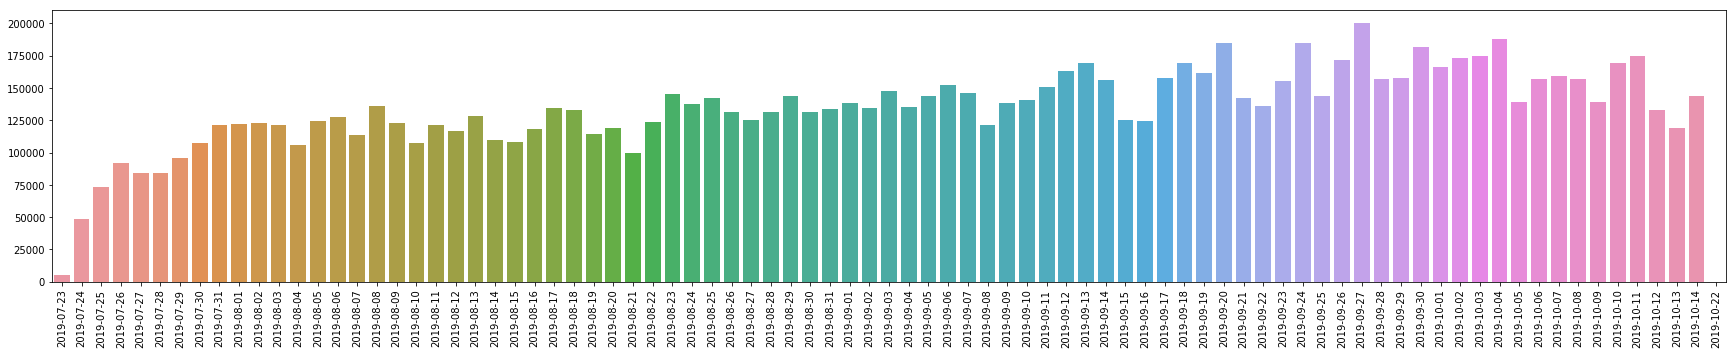

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(30, 5))
a = trn_df.time_ut.value_counts().sort_index()
sns.barplot(a.index, a.values, ax=ax)
ax.tick_params(axis='x', rotation=90)
plt.show()

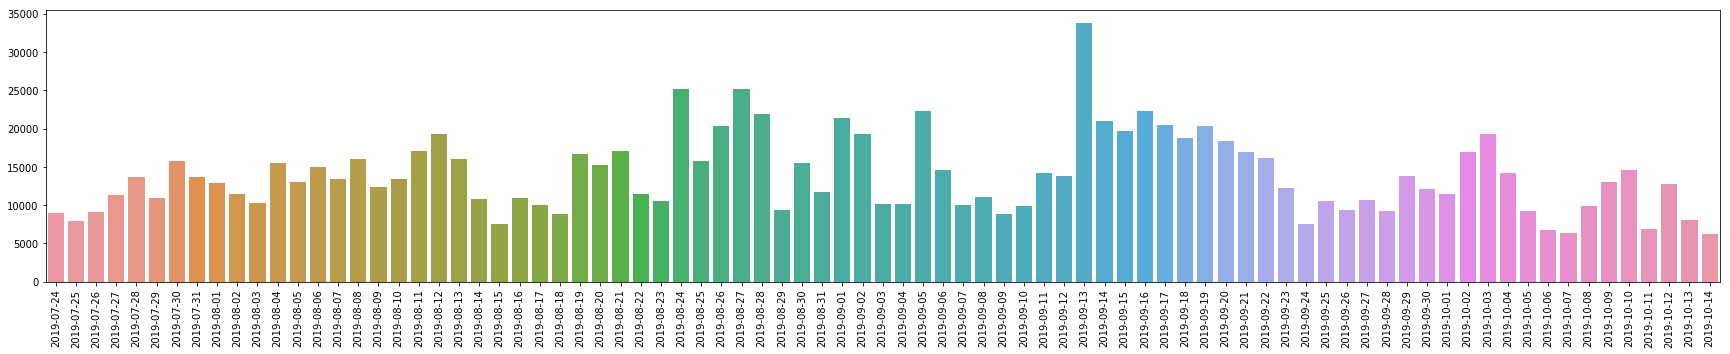

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(30, 5))
a = tst_df.time_ut.value_counts().sort_index()
sns.barplot(a.index, a.values, ax=ax)
ax.tick_params(axis='x', rotation=90)
plt.show()

In [50]:
pd.crosstab(label_df.title, label_df.accuracy_group)

accuracy_group,0,1,2,3
title,,,,
Bird Measurer (Assessment),886,778,389,693
Cart Balancer (Assessment),576,353,470,2752
Cauldron Filler (Assessment),421,459,630,2545
Chest Sorter (Assessment),1752,466,256,507
Mushroom Sorter (Assessment),594,355,460,2348


In [49]:
label_df.head()

,game_session,installation_id,title,num_correct,num_incorrect,accuracy,accuracy_group
0,6bdf9623adc94d89,0006a69f,Mushroom Sorter (Assessment),1,0,1.0,3
1,77b8ee947eb84b4e,0006a69f,Bird Measurer (Assessment),0,11,0.0,0
2,901acc108f55a5a1,0006a69f,Mushroom Sorter (Assessment),1,0,1.0,3
3,9501794defd84e4d,0006a69f,Mushroom Sorter (Assessment),1,1,0.5,2
4,a9ef3ecb3d1acc6a,0006a69f,Bird Measurer (Assessment),1,0,1.0,3


In [37]:
label_df = pd.read_csv('../mnt/inputs/origin/train_labels.csv')
df2 = pd.read_pickle('../mnt/inputs/features/train/KernelBasics2.pkl')
df3 = pd.read_pickle('../mnt/inputs/features/train/KernelBasics3.pkl')

In [38]:
df2.head()

,12 Monkeys,Air Show,All Star Sorting,Balancing Act,Bird Measurer (Assessment),Bottle Filler (Activity),Bubble Bath,Bug Measurer (Activity),Cart Balancer (Assessment),Cauldron Filler (Assessment),...,prev_acc_gr_0,prev_acc_gr_1,prev_acc_gr_2,prev_acc_gr_3,prev_cumnum_c,prev_cumnum_inc,prev_num_corrects,prev_num_incorrects,title,type
0,0,0,164,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Mushroom Sorter (Assessment),Assessment
1,0,193,164,0,0,0,0,104,0,0,...,0,0,0,1,1,0,1,0,Bird Measurer (Assessment),Assessment
2,0,193,164,0,92,0,0,104,0,0,...,1,0,0,0,1,11,0,11,Mushroom Sorter (Assessment),Assessment
3,0,193,231,0,92,165,133,104,0,0,...,0,0,0,1,2,11,1,0,Mushroom Sorter (Assessment),Assessment
4,0,337,231,0,92,165,133,185,0,0,...,0,0,1,0,3,12,1,1,Bird Measurer (Assessment),Assessment


In [39]:
df3.head()

,12 Monkeys,Air Show,All Star Sorting,Balancing Act,Bottle Filler (Activity),Bubble Bath,Bug Measurer (Activity),Chicken Balancer (Activity),Chow Time,Costume Box,...,prev_acc_gr_-99,prev_acc_gr_0,prev_acc_gr_1,prev_acc_gr_2,prev_acc_gr_3,prev_cumnum_c,prev_cumnum_inc,prev_num_corrects,prev_num_incorrects,type
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Clip
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Clip
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Activity
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Clip
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Game


In [40]:
df2.sort_values('game_session').head()

,12 Monkeys,Air Show,All Star Sorting,Balancing Act,Bird Measurer (Assessment),Bottle Filler (Activity),Bubble Bath,Bug Measurer (Activity),Cart Balancer (Assessment),Cauldron Filler (Assessment),...,prev_acc_gr_0,prev_acc_gr_1,prev_acc_gr_2,prev_acc_gr_3,prev_cumnum_c,prev_cumnum_inc,prev_num_corrects,prev_num_incorrects,title,type
2,0,0,63,0,0,0,0,0,34,0,...,1,0,0,0,1,4,0,4,Mushroom Sorter (Assessment),Assessment
3,0,83,40,0,0,28,0,0,28,33,...,0,0,0,1,3,1,1,0,Chest Sorter (Assessment),Assessment
9,0,141,41,0,66,562,325,163,37,87,...,0,0,0,1,9,9,1,0,Bird Measurer (Assessment),Assessment
2,0,116,172,0,124,0,0,73,0,0,...,0,1,0,0,2,7,1,7,Mushroom Sorter (Assessment),Assessment
6,0,179,65,0,41,0,0,147,61,0,...,0,0,1,0,6,2,1,1,Bird Measurer (Assessment),Assessment


In [41]:
df3.sort_values('game_session').head()

,12 Monkeys,Air Show,All Star Sorting,Balancing Act,Bottle Filler (Activity),Bubble Bath,Bug Measurer (Activity),Chicken Balancer (Activity),Chow Time,Costume Box,...,prev_acc_gr_-99,prev_acc_gr_0,prev_acc_gr_1,prev_acc_gr_2,prev_acc_gr_3,prev_cumnum_c,prev_cumnum_inc,prev_num_corrects,prev_num_incorrects,type
76,0,0,22,0,2750,10673,0,0,0,0,...,0,0,0,0,0,1,7,0,0,Game
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Clip
26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,4,0,0,Activity
43,0,237,341,0,0,0,0,0,721,0,...,0,0,0,0,0,0,4,0,0,Clip
13,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Clip


In [43]:
df2.shape, df3.shape

((17690, 65), (175467, 57))

In [87]:
df3.type.value_counts()

Clip          90707
Game          34527
Activity      30141
Assessment    20092
Name: type, dtype: int64

In [88]:
df2.shape[0] == df2.game_session.nunique()

True

In [90]:
a = df2[['game_session']].merge(df3, on='game_session', how='left')

In [47]:
a.sort_values('game_session').set_index('game_session').head()

,12 Monkeys,Air Show,All Star Sorting,Balancing Act,Bottle Filler (Activity),Bubble Bath,Bug Measurer (Activity),Chicken Balancer (Activity),Chow Time,Costume Box,...,prev_acc_gr_-99,prev_acc_gr_0,prev_acc_gr_1,prev_acc_gr_2,prev_acc_gr_3,prev_cumnum_c,prev_cumnum_inc,prev_num_corrects,prev_num_incorrects,type
game_session,,,,,,,,,,,,,,,,,,,,,
00097cda27afb726,0,0,63,0,0,0,0,243,129,0,...,1,0,0,0,0,1,4,0,0,Assessment
000f68cff32664ef,0,83,40,0,28,0,0,17,29,0,...,1,0,0,0,0,3,1,0,0,Assessment
0014403daadf67aa,0,141,41,0,562,325,163,507,474,0,...,1,0,0,0,0,9,9,0,0,Assessment
0014daa1d3e26eb2,0,116,172,0,0,0,73,0,0,0,...,1,0,0,0,0,2,7,0,0,Assessment
001c49e9e9968dbe,0,179,65,0,0,0,147,109,56,0,...,1,0,0,0,0,6,2,0,0,Assessment


In [48]:
df2.sort_values('game_session').set_index('game_session').head()

,12 Monkeys,Air Show,All Star Sorting,Balancing Act,Bird Measurer (Assessment),Bottle Filler (Activity),Bubble Bath,Bug Measurer (Activity),Cart Balancer (Assessment),Cauldron Filler (Assessment),...,prev_acc_gr_0,prev_acc_gr_1,prev_acc_gr_2,prev_acc_gr_3,prev_cumnum_c,prev_cumnum_inc,prev_num_corrects,prev_num_incorrects,title,type
game_session,,,,,,,,,,,,,,,,,,,,,
00097cda27afb726,0,0,63,0,0,0,0,0,34,0,...,1,0,0,0,1,4,0,4,Mushroom Sorter (Assessment),Assessment
000f68cff32664ef,0,83,40,0,0,28,0,0,28,33,...,0,0,0,1,3,1,1,0,Chest Sorter (Assessment),Assessment
0014403daadf67aa,0,141,41,0,66,562,325,163,37,87,...,0,0,0,1,9,9,1,0,Bird Measurer (Assessment),Assessment
0014daa1d3e26eb2,0,116,172,0,124,0,0,73,0,0,...,0,1,0,0,2,7,1,7,Mushroom Sorter (Assessment),Assessment
001c49e9e9968dbe,0,179,65,0,41,0,0,147,61,0,...,0,0,1,0,6,2,1,1,Bird Measurer (Assessment),Assessment


In [ ]:
for col in a.columns:
    if (a[col].fillna(0).values == df2[col].fillna(0).values).all():
        continue
    print(f'----------- {col} ----------')

In [93]:
a[['installation_id', 'accum_acc_gr_3']][a['accum_acc_gr_3'].values == df2['accum_acc_gr_3'].values]

,installation_id,accum_acc_gr_3
0,0006a69f,0
5,0006c192,0
6,0006c192,1
7,0006c192,1
8,00129856,0
...,...,...
17681,ffc90c32,0
17686,ffd2871d,0
17687,ffeb0b1b,0
17688,ffeb0b1b,0


In [91]:
a[['installation_id', 'accum_acc_gr_3']][a['accum_acc_gr_3'].values != df2['accum_acc_gr_3'].values]

,installation_id,accum_acc_gr_3
1,0006a69f,0
2,0006a69f,0
3,0006a69f,0
4,0006a69f,0
11,001d0ed0,0
...,...,...
17679,ff9715db,0
17682,ffc90c32,0
17683,ffc90c32,0
17684,ffc90c32,0


In [94]:
df2[['installation_id', 'accum_acc_gr_3']][a['accum_acc_gr_3'].values == df2['accum_acc_gr_3'].values]

,installation_id,accum_acc_gr_3
0,0006a69f,0
0,0006c192,0
1,0006c192,1
2,0006c192,1
0,00129856,0
...,...,...
1,ffc90c32,0
0,ffd2871d,0
0,ffeb0b1b,0
1,ffeb0b1b,0


In [92]:
df2[['installation_id', 'accum_acc_gr_3']][a['accum_acc_gr_3'].values != df2['accum_acc_gr_3'].values]

,installation_id,accum_acc_gr_3
1,0006a69f,1
2,0006a69f,1
3,0006a69f,2
4,0006a69f,2
2,001d0ed0,1
...,...,...
8,ff9715db,5
2,ffc90c32,1
3,ffc90c32,2
4,ffc90c32,3


In [72]:
for col in a.columns:
    if (a[col].fillna(0).values == df2[col].fillna(0).values).all():
        continue
    print(f'----------- {col} ----------')

----------- accum_acc_gr_-99 ----------
----------- accum_acc_gr_0 ----------
----------- accum_acc_gr_1 ----------
----------- accum_acc_gr_2 ----------
----------- accum_acc_gr_3 ----------
----------- prev_acc_gr_-99 ----------
----------- prev_acc_gr_0 ----------
----------- prev_acc_gr_1 ----------
----------- prev_acc_gr_2 ----------
----------- prev_acc_gr_3 ----------
----------- prev_num_corrects ----------
----------- prev_num_incorrects ----------


In [81]:
def ins_id_sessions(df):
    """session当該session直前までのactivityを示す
    Args:
        df: df grouped by installation_id
    """
    # initialize user activity
    # 1. time spent
    # 2. event count
    # 3. session count

    # sessionごとのplaytimeを算出
    df["gs_max_time"] = df.groupby("game_session")["timestamp"].transform(
        "max")  # gs_max_timeでsortする必要がある

    pv = pd.pivot_table(df, index=["gs_max_time", "game_session", "type"],
                        columns="title",
                        values="game_time",
                        aggfunc="max").fillna(0)

    # 時刻順に並ぶことを保証する
    pv.sort_values("gs_max_time", ascending=True, inplace=True)
    pv.reset_index(inplace=True)

    cum_cols = [
        c for c in list(
            pv.columns) if c not in [
            "type",
            "game_session",
            "gs_max_time"]]
    pv[cum_cols] = (pv[cum_cols].cumsum() // 1000).astype("int32")
    pv[cum_cols] = pv[cum_cols].shift(1)  # 直前までのplaytimeを取得する

    ins_id = df.installation_id.values[0]

    # assessmentのrowに限定して抽出する
    # calc num corrects
    num_c_df = df.loc[df.type == "Assessment"].groupby(["installation_id", "game_session"])[
        ["num_correct", "num_incorrect"]].sum().fillna(0).reset_index()
    pv = pd.merge(pv, num_c_df, how="left", on="game_session")

    gc.collect()

    # 直前までの正解状況を集計
    pv["prev_num_corrects"] = pv["num_correct"].shift(1).fillna(0)
    pv["prev_cumnum_c"] = pv["prev_num_corrects"].cumsum()
    pv["prev_num_incorrects"] = pv["num_incorrect"].shift(1).fillna(0)
    pv["prev_cumnum_inc"] = pv["prev_num_incorrects"].cumsum()

    pv["cum_accuracy"] = (pv["prev_cumnum_c"] /
                          (pv["prev_cumnum_c"] + pv["prev_cumnum_inc"])) #.fillna(0)

    del pv["num_correct"], pv["num_incorrect"]
    gc.collect()

    pv = get_acc_group(pv)
    del pv["gs_max_time"]

    # if self.datatype == "test":
    #     pv = pd.DataFrame([pv.iloc[-1, :]])

    return pv

def get_acc_group(pv):
        def calc_accuracy_group(row):
            if row["prev_num_incorrects"] + row["prev_num_corrects"] > 0:
                acc = row["prev_num_corrects"] / \
                    (row["prev_num_incorrects"] + row["prev_num_corrects"])
                if acc == 0:
                    return 0
                elif acc == 1:
                    return 3
                elif acc == 0.5:
                    return 2
                else:
                    return 1
            else:
                return -99

        pv["acc_group"] = pv.apply(calc_accuracy_group, axis=1)
        acc_pv = pd.pivot_table(pv[["gs_max_time",
                                    "installation_id",
                                    "game_session",
                                    "acc_group"]],
                                index=["gs_max_time",
                                       "game_session"],
                                columns="acc_group",
                                values="installation_id",
                                aggfunc="count").reset_index().fillna(0)

        del pv["acc_group"]

        acc_columns = {}
        for col in acc_pv.columns:
            if col in [-99, 0, 1, 2, 3]:
                acc_columns[col] = "prev_acc_gr_" + str(col)
                acc_pv[f"accum_acc_gr_{col}"] = acc_pv[col].cumsum()

        acc_pv.rename(columns=acc_columns, inplace=True)
        del acc_pv["gs_max_time"]
        pv = pd.merge(pv, acc_pv, on="game_session", how="left")

        return pv

In [83]:
trn_df.drop_duplicates('game_session').type.value_counts()

Clip          183676
Game           52399
Activity       46005
Assessment     21239
Name: type, dtype: int64

In [75]:
tst_df.head()

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world,time_ut
0,27253bdc,0ea9ecc81a565215,2019-09-10T16:50:24.910Z,"{""event_code"": 2000, ""event_count"": 1}",00abaee7,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE,2019-09-10
1,27253bdc,c1ea43d8b8261d27,2019-09-10T16:50:55.503Z,"{""event_code"": 2000, ""event_count"": 1}",00abaee7,1,2000,0,Magma Peak - Level 1,Clip,MAGMAPEAK,2019-09-10
2,27253bdc,7ed86c6b72e725e2,2019-09-10T16:51:51.805Z,"{""event_code"": 2000, ""event_count"": 1}",00abaee7,1,2000,0,Magma Peak - Level 2,Clip,MAGMAPEAK,2019-09-10
3,27253bdc,7e516ace50e7fe67,2019-09-10T16:53:12.825Z,"{""event_code"": 2000, ""event_count"": 1}",00abaee7,1,2000,0,Crystal Caves - Level 1,Clip,CRYSTALCAVES,2019-09-10
4,7d093bf9,a022c3f60ba547e7,2019-09-10T16:54:12.115Z,"{""version"":""1.0"",""round"":0,""event_count"":1,""ga...",00abaee7,1,2000,0,Chow Time,Game,CRYSTALCAVES,2019-09-10


In [84]:
import gc
a = tst_df.query('installation_id == "00abaee7"')
a['num_correct'] = 1
a['num_incorrect'] = 1

ins_id_sessions(a)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

,game_session,type,12 Monkeys,All Star Sorting,Balancing Act,Bug Measurer (Activity),Cart Balancer (Assessment),Cauldron Filler (Assessment),Chow Time,Costume Box,...,installation_id,prev_num_corrects,prev_cumnum_c,prev_num_incorrects,prev_cumnum_inc,cum_accuracy,prev_acc_gr_-99,prev_acc_gr_2,accum_acc_gr_-99,accum_acc_gr_2
0,0ea9ecc81a565215,Clip,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0
1,c1ea43d8b8261d27,Clip,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0
2,7ed86c6b72e725e2,Clip,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0
3,7e516ace50e7fe67,Clip,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0
4,a022c3f60ba547e7,Game,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0
5,1c203986674d7d9b,Clip,0.0,0.0,0.0,0.0,0.0,0.0,135.0,0.0,...,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0
6,c58423edbb934d93,Clip,0.0,0.0,0.0,0.0,0.0,0.0,135.0,0.0,...,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0
7,3b845db6d1d108b5,Clip,0.0,0.0,0.0,0.0,0.0,0.0,135.0,0.0,...,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0
8,2841aa0233220ac0,Game,0.0,0.0,0.0,0.0,0.0,0.0,135.0,0.0,...,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0
9,18c82207b2e63482,Clip,0.0,1960.0,0.0,0.0,0.0,0.0,135.0,0.0,...,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0


In [95]:
c_ass_idx = ((trn_df.event_code == 4100)
             & (trn_df.title != "Bird Measurer (Assessment)")
             & (trn_df["event_data"].str.contains("true"))) | \
    ((trn_df.event_code == 4110)
     & (trn_df.title == "Bird Measurer (Assessment)")
     & (trn_df["event_data"].str.contains("true")))

inc_ass_idx = ((trn_df.event_code == 4100)
               & (trn_df.title != "Bird Measurer (Assessment)")
               & (trn_df["event_data"].str.contains("false"))) | \
    ((trn_df.event_code == 4110)
     & (trn_df.title == "Bird Measurer (Assessment)")
     & (trn_df["event_data"].str.contains("false")))

trn_df.loc[c_ass_idx, 'num_correct'] = 1
trn_df.loc[inc_ass_idx, 'num_incorrect'] = 1

In [ ]:
trn_df[
    (trn_df.type == 'Assessment')
    & (trn_df.type == '')
    & (trn_df.type == '')
]

In [98]:
label_df[['num_correct', 'num_incorrect']].sum(axis=1).value_counts()

1     10064
2      2994
3      1559
4      1007
5       617
6       421
7       269
8       193
9       116
10       95
11       82
12       47
13       45
14       38
15       25
18       18
16       16
17       15
21       12
20       10
23        8
19        7
24        4
29        3
34        3
25        2
22        2
41        2
27        2
50        1
49        1
33        1
32        1
79        1
35        1
36        1
85        1
39        1
40        1
60        1
45        1
46        1
54        1
dtype: int64